In [40]:
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter)
import cmaps 
from gcpy import single_panel 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
from matplotlib.gridspec import GridSpec

import regionmask
from scipy import stats 
import seaborn as sns
import xarray as xr

from ozclim import tools

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ref = tools.get_ensemble_ds("ref", "MDA8_O3")*1e9 # ppbv
refSNOx = tools.get_ensemble_ds("refSNOx", "MDA8_O3")*1e9 # ppbv
present_diff = refSNOx-ref

['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w10_ref_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w13_ref_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w14_ref_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w26_ref_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w28_ref_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w10_refSNOx_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w13_refSNOx_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w14_refSNOx_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w26_refSNOx_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_da

In [ ]:
refshort = tools.get_ensemble_ds("refshort", "MDA8_O3")*1e9 # ppbv
refSNOxshort = tools.get_ensemble_ds("refSNOxshort", "MDA8_O3")*1e9 # ppbv
future_diff = refSNOxshort-refshort

['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w10_refshort_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w13_refshort_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w14_refshort_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w26_refshort_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w28_refshort_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w10_refSNOxshort_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w13_refSNOxshort_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w14_refSNOxshort_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w26_refSNOxshort_c48.MDA8_O3.nc4']
['/

In [4]:
mean_jul_pres = present_diff['SpeciesConc_O3'].sel(
    time=present_diff.time.dt.month.isin([7])).mean(
        dim=['sim','time']).isel(lev=0, drop=True)
mean_dec_pres = present_diff['SpeciesConc_O3'].sel(
    time=present_diff.time.dt.month.isin([12])).mean(
        dim=['sim','time']).isel(lev=0, drop=True)

In [5]:
mean_jul_fut = future_diff['SpeciesConc_O3'].sel(
    time=future_diff.time.dt.month.isin([7])).mean(
    dim=['sim','time']).isel(lev=0, drop=True)
mean_dec_fut = future_diff['SpeciesConc_O3'].sel(
    time=future_diff.time.dt.month.isin([12])).mean(
    dim=['sim','time']).isel(lev=0, drop=True)

In [6]:
mean_jul_pres_land = tools.mask_ocean_c48(mean_jul_pres)
mean_dec_pres_land = tools.mask_ocean_c48(mean_dec_pres)

mean_jul_fut_land = tools.mask_ocean_c48(mean_jul_fut)
mean_dec_fut_land = tools.mask_ocean_c48(mean_dec_fut)

jul_pres_ENA = tools.crop_regionmask_ar6_c48(mean_jul_pres_land, 5)
jul_pres_WCE = tools.crop_regionmask_ar6_c48(mean_jul_pres_land, 17)
jul_pres_EAS = tools.crop_regionmask_ar6_c48(mean_jul_pres_land, 35)

dec_pres_ENA = tools.crop_regionmask_ar6_c48(mean_dec_pres_land, 5)
dec_pres_WCE = tools.crop_regionmask_ar6_c48(mean_dec_pres_land, 17)
dec_pres_EAS = tools.crop_regionmask_ar6_c48(mean_dec_pres_land, 35)

mean_jul_pres_ENA = jul_pres_ENA.mean(dim=['nf', 'Ydim', 'Xdim'])
mean_jul_pres_WCE = jul_pres_WCE.mean(dim=['nf', 'Ydim', 'Xdim'])
mean_jul_pres_EAS = jul_pres_EAS.mean(dim=['nf', 'Ydim', 'Xdim'])

mean_dec_pres_ENA = dec_pres_ENA.mean(dim=['nf', 'Ydim', 'Xdim'])
mean_dec_pres_WCE = dec_pres_WCE.mean(dim=['nf', 'Ydim', 'Xdim'])
mean_dec_pres_EAS = dec_pres_EAS.mean(dim=['nf', 'Ydim', 'Xdim'])


In [7]:
print(mean_jul_pres_ENA.values)
print(mean_jul_pres_WCE.values)
print(mean_jul_pres_EAS.values)

print(mean_dec_pres_ENA.values)
print(mean_dec_pres_WCE.values)
print(mean_dec_pres_EAS.values)


[-1.22403222]
[-0.75332341]
[-0.90403603]
[-0.20146362]
[-0.16257585]
[0.34968362]


In [10]:
jul_fut_ENA = tools.crop_regionmask_ar6_c48(mean_jul_fut_land, 5)
jul_fut_WCE = tools.crop_regionmask_ar6_c48(mean_jul_fut_land, 17)
jul_fut_EAS = tools.crop_regionmask_ar6_c48(mean_jul_fut_land, 35)

dec_fut_ENA = tools.crop_regionmask_ar6_c48(mean_dec_fut_land, 5)
dec_fut_WCE = tools.crop_regionmask_ar6_c48(mean_dec_fut_land, 17)
dec_fut_EAS = tools.crop_regionmask_ar6_c48(mean_dec_fut_land, 35)

mean_jul_fut_ENA = jul_fut_ENA.mean(dim=['nf', 'Ydim', 'Xdim'])
mean_jul_fut_WCE = jul_fut_WCE.mean(dim=['nf', 'Ydim', 'Xdim'])
mean_jul_fut_EAS = jul_fut_EAS.mean(dim=['nf', 'Ydim', 'Xdim'])

mean_dec_fut_ENA = dec_fut_ENA.mean(dim=['nf', 'Ydim', 'Xdim'])
mean_dec_fut_WCE = dec_fut_WCE.mean(dim=['nf', 'Ydim', 'Xdim'])
mean_dec_fut_EAS = dec_fut_EAS.mean(dim=['nf', 'Ydim', 'Xdim'])

In [11]:
print(mean_jul_fut_ENA.values)
print(mean_jul_fut_WCE.values)
print(mean_jul_fut_EAS.values)

print(mean_dec_fut_ENA.values)
print(mean_dec_fut_WCE.values)
print(mean_dec_fut_EAS.values)


[-1.2116874]
[-0.75766286]
[-0.94662945]
[-0.14381822]
[-0.13298815]
[0.38212814]


In [36]:
# Figure 2cdefgh
ref = tools.get_ensemble_ds("ref", "MDA8_O3")*1e9 # ppbv
refSNOx = tools.get_ensemble_ds("refSNOx", "MDA8_O3")*1e9 # ppbv

refshort = tools.get_ensemble_ds("refshort", "MDA8_O3")*1e9 # ppbv
refSNOxshort = tools.get_ensemble_ds("refSNOxshort", "MDA8_O3")*1e9 # ppbv

polshort = tools.get_ensemble_ds("pol3.7short", "MDA8_O3")*1e9 # ppbv
polSNOxshort = tools.get_ensemble_ds("pol3.7SNOxshort", "MDA8_O3")*1e9 # ppbv

present_diff = refSNOx-ref
future_diff = refSNOxshort-refshort
futurepol_diff = polSNOxshort-polshort

present_diff_noland = tools.mask_ocean_c48(present_diff)
future_diff_noland = tools.mask_ocean_c48(future_diff)
futurepol_diff_noland = tools.mask_ocean_c48(futurepol_diff)

present_diff_noland = present_diff_noland.resample(time='1M').mean(dim='time')
future_diff_noland = future_diff_noland.resample(time='1M').mean(dim='time')
futurepol_diff_noland = futurepol_diff_noland.resample(time='1M').mean(dim='time')

['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w10_ref_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w13_ref_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w14_ref_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w26_ref_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w28_ref_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w10_refSNOx_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w13_refSNOx_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w14_refSNOx_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w26_refSNOx_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_da

/home/eleroy/.conda/envs/OZCLIM-env/lib/python3.10/site-packages/xarray/core/groupby.py:346: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/eleroy/.conda/envs/OZCLIM-env/lib/python3.10/site-packages/xarray/core/groupby.py:346: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/eleroy/.conda/envs/OZCLIM-env/lib/python3.10/site-packages/xarray/core/groupby.py:346: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:


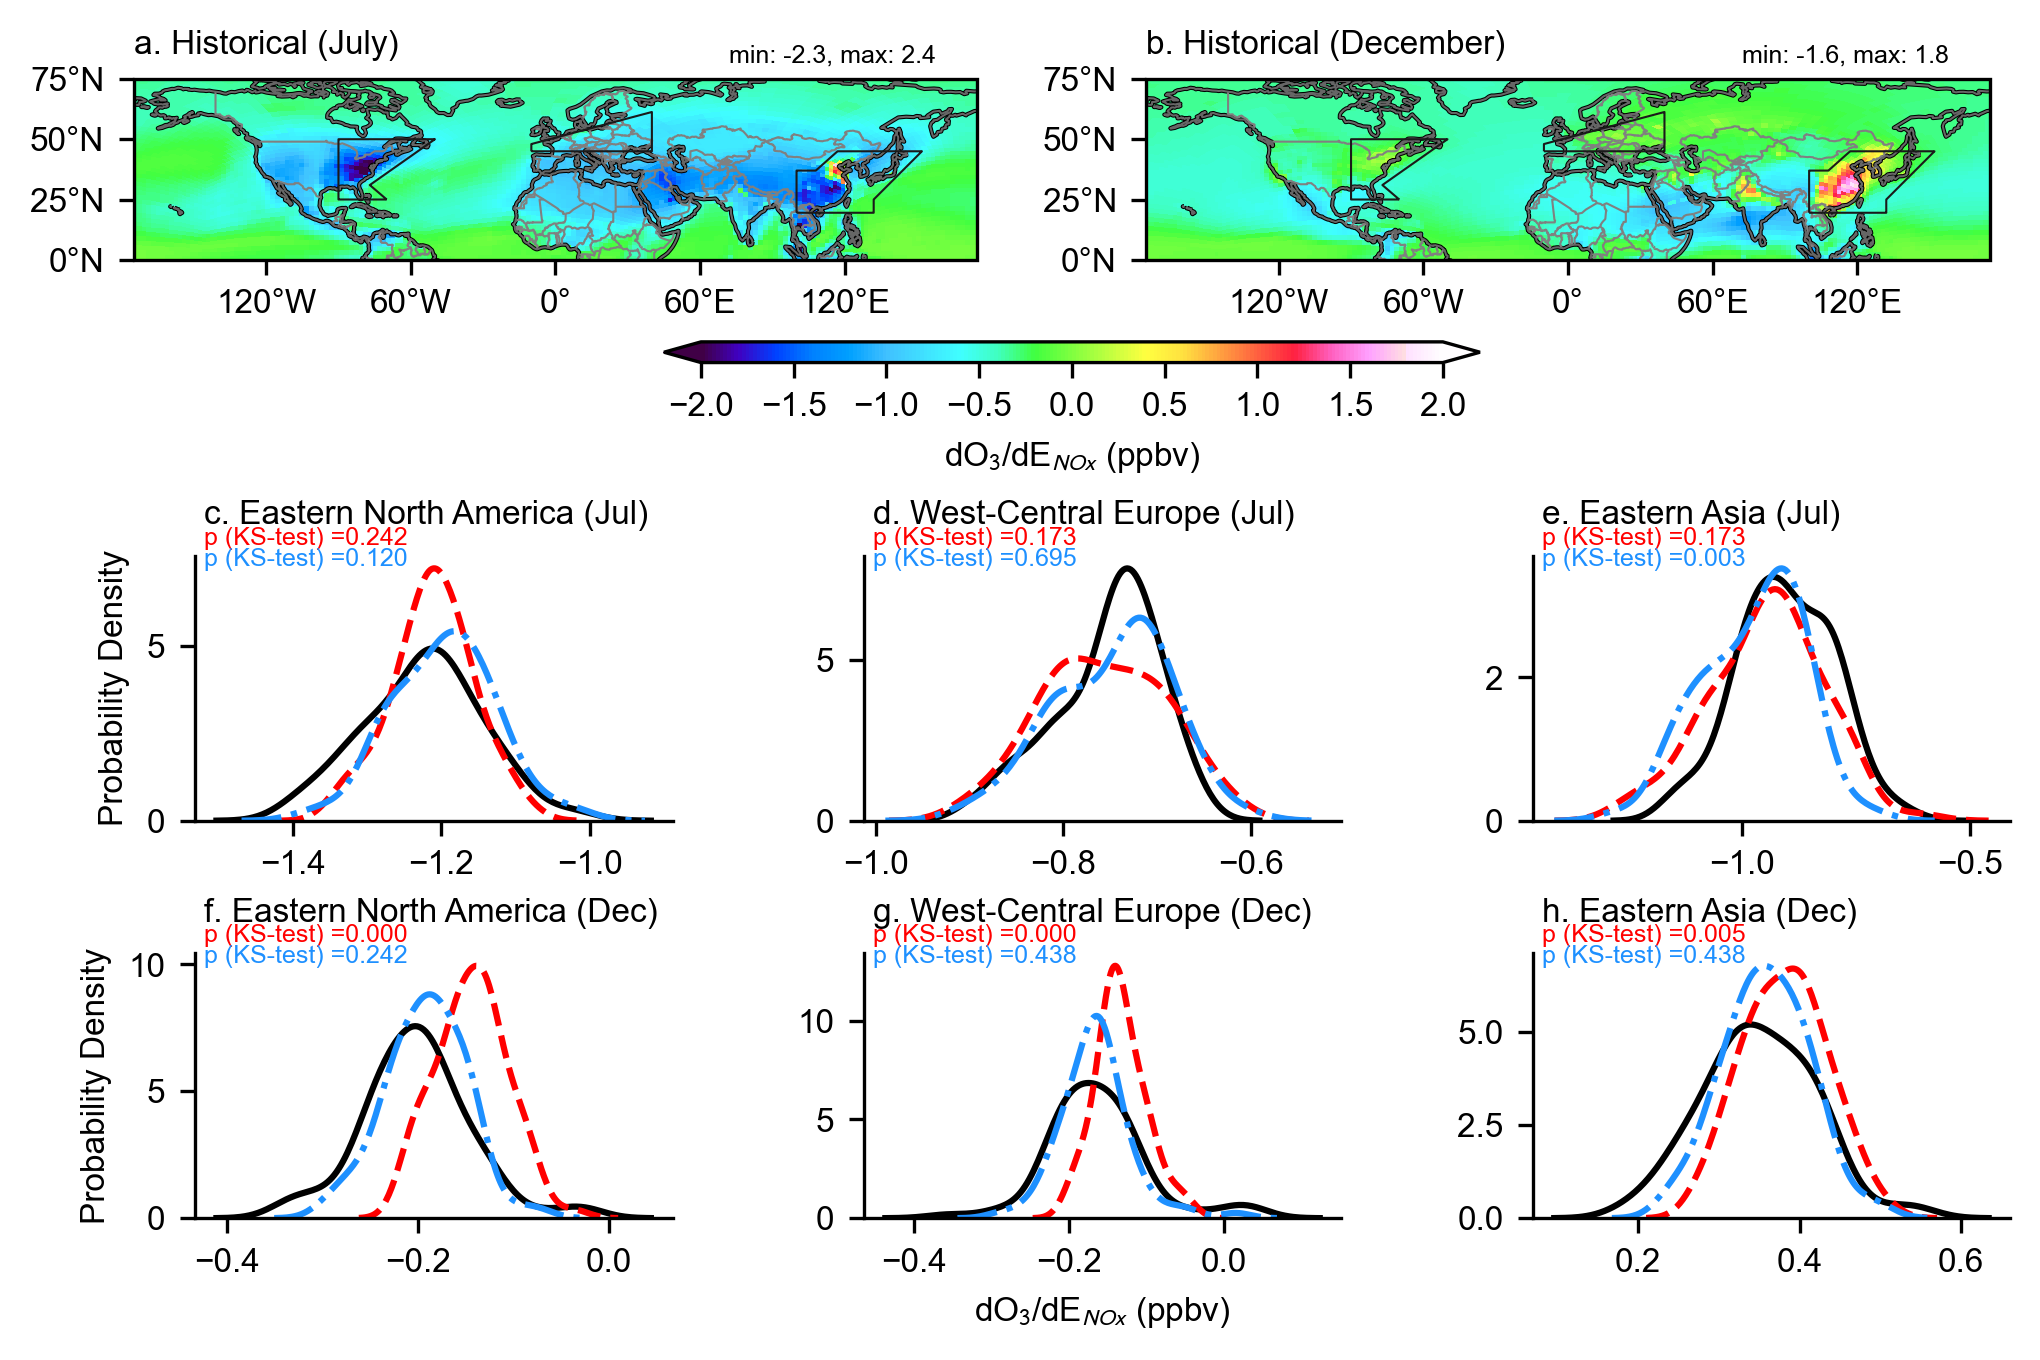

In [56]:
tools.set_matplotlib_font("Arial")
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
    
color = 'black'

mpl.rcParams.update({
    'axes.edgecolor': color,      # Color of the axes spines
    'xtick.color': color,         # Color of the x-axis ticks
    'ytick.color': color,         # Color of the y-axis ticks
    'xtick.labelcolor': color,    # Color of the x-axis tick labels
    'ytick.labelcolor': color,    # Color of the y-axis tick labels
    'grid.color': color,          # Color of the grid lines
    'axes.labelcolor': color,     # Color of the axis labels
    'axes.titlecolor': color,     # Color of the plot titles
})

mpl.rcParams.update({
    'font.size': 8, 
    'axes.titlesize': 8, 
    'axes.labelsize': 8,
    'xtick.labelsize': 8, 
    'ytick.labelsize': 8, 
    'legend.fontsize': 8,
    'figure.titlesize': 8
})

fig_width_in = 6.8
fig_height_in = 4.6

fig = plt.figure(figsize=(fig_width_in, fig_height_in), dpi=300)

gs1 = GridSpec(1, 2, top=0.99, bottom=0.73, left=0.07, right=0.98, hspace=0.2, wspace=0.2)
ax1 = fig.add_subplot(gs1[0, 0], projection=ccrs.PlateCarree(central_longitude=0))
ax2 = fig.add_subplot(gs1[0, 1], projection=ccrs.PlateCarree(central_longitude=0))

gs2 = GridSpec(2, 3, top=0.58, bottom=0.10, left=0.10, right=0.99, hspace = 0.50, wspace=0.4)
ax3 = fig.add_subplot(gs2[0, 0])
ax4 = fig.add_subplot(gs2[0, 1])
ax5 = fig.add_subplot(gs2[0, 2])

ax6 = fig.add_subplot(gs2[1, 0])
ax7 = fig.add_subplot(gs2[1, 1])
ax8 = fig.add_subplot(gs2[1, 2])

ax = [ax1, ax2]
titles= ["a. Historical (July)", "b. Historical (December)"]

for idx, z in enumerate([mean_jul_pres, mean_dec_pres]):

    cmap = cmaps.GMT_wysiwygcont

    plot = single_panel(plot_vals=z, 
                ax=ax[idx], gridtype="cs", 
                comap=cmap,
                extent=(-175, 175, 0, 75), 
                vmin=-2, vmax=2,
                unit="ppbv",
                title=None,
                add_cb=False)


    ax[idx].coastlines(linewidth=0.5)
    country_borders = cfeature.NaturalEarthFeature(
        category="cultural",
        name="admin_0_boundary_lines_land",
        scale="50m",
        facecolor="none",
    )
    ax[idx].add_feature(country_borders, edgecolor="gray", linewidth=0.5)
    ax[idx].set_extent([-175, 175, 0, 75], crs=ccrs.PlateCarree())
    ax[idx].set_title(titles[idx], loc='left', size=8)

    ax[idx].set_xticks([-120, -60, 0, 60, 120])
    ax[idx].set_xticklabels(
            ['120°W', '60°W', '0°', '60°E', '120°E'], fontsize=8)
    ax[idx].set_yticks([0,25,50,75])
    ax[idx].set_yticklabels(
            ['0°N', '25°N', '50°N', '75°N'], fontsize=8)
   

    # Add boxes around the IPCC AR6 regions
    ar6 = regionmask.defined_regions.ar6.all
    ar6[5,17,35].plot(ax=ax[idx],
        add_ocean=False,
        projection=ccrs.PlateCarree(),
        add_label=False,
        line_kws=dict(lw=0.5)
    )

    ax[idx].annotate("min: "+"{:.1f}".format(z.min().values)+", max: "+"{:.1f}".format(z.max().values), (72,82), size=6)

ticks = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
cbar_ax = fig.add_axes([0.33, 0.72, 0.4, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(plot, ticks=ticks, cax=cbar_ax, **kw)
cbar.set_label('dO$_3$/dE$_{NOx}$ (ppbv)', fontsize=8) # ($\Delta$ MDA8 O$_3$ per 10$\%$ reduction in E$_{NO_x}$)

ax = [ax3, ax4, ax5, ax6, ax7, ax8]
titles= ["c. Eastern North America (Jul)", "d. West-Central Europe (Jul)", "e. Eastern Asia (Jul)",
         "f. Eastern North America (Dec)", "g. West-Central Europe (Dec)", "h. Eastern Asia (Dec)"]
months = [7,7,7, 12,12,12]
ar6_region = {
        "ENA": 5,
        "EAS": 35,
        "WCE": 17,
    }

all_ps = []
all_fs = []
all_fps = []
all_regions = []
all_months = []
for _, (region, indices) in enumerate(zip(["ENA", "WCE", "EAS"], [[0,3],[1,4],[2,5]])):

    present_diff_noland_region = tools.crop_regionmask_ar6_c48(present_diff_noland, region_num=ar6_region[region])
    future_diff_noland_region = tools.crop_regionmask_ar6_c48(future_diff_noland, region_num=ar6_region[region])  
    futurepol_diff_noland_region = tools.crop_regionmask_ar6_c48(futurepol_diff_noland, region_num=ar6_region[region])    

    for idx, month in enumerate([7,12]):
        present_diff_noland_region_month = present_diff_noland_region['SpeciesConc_O3'].sel(time=present_diff_noland_region.time.dt.month.isin(month)).mean(dim=['nf', 'Ydim', 'Xdim'])#.isel(lev=0, region=0, drop=True)
        future_diff_noland_region_month = future_diff_noland_region['SpeciesConc_O3'].sel(time=future_diff_noland_region.time.dt.month.isin(month)).mean(dim=['nf', 'Ydim', 'Xdim'])#.isel(lev=0, region=0, drop=True)
        futurepol_diff_noland_region_month = futurepol_diff_noland_region['SpeciesConc_O3'].sel(time=futurepol_diff_noland_region.time.dt.month.isin(month)).mean(dim=['nf', 'Ydim', 'Xdim'])#.isel(lev=0, region=0, drop=True)

        p = present_diff_noland_region_month.values.flatten()
        f = future_diff_noland_region_month.values.flatten()
        fp = futurepol_diff_noland_region_month.values.flatten()

        all_ps.append(p)
        all_fs.append(f)
        all_fps.append(fp)
        all_regions.append(region)
        all_months.append(month)

        sns.kdeplot(data=p, ax=ax[indices[idx]], color='black', linestyle='-', fill=False, legend='brief')
        sns.kdeplot(data=f, ax=ax[indices[idx]], color='red', linestyle='--', fill=False, legend='brief')
        sns.kdeplot(data=fp, ax=ax[indices[idx]], color='dodgerblue', linestyle='-.', fill=False, legend='brief')
        #sns.kdeplot(data=fp, ax=ax[indices[idx]], color='red', linestyle='--', fill=False, legend='brief')

        _, f_pval_ks = stats.ks_2samp(p, f)
        _, fp_pval_ks = stats.ks_2samp(p, fp)

        formatted_f_pval_ks = format(f_pval_ks, ".3f")
        formatted_fp_pval_ks = format(fp_pval_ks, ".3f")

        ax[indices[idx]].text(.02, 1.11, "p (KS-test) ="+formatted_f_pval_ks, ha='left', va='top', transform=ax[indices[idx]].transAxes, color='red', fontsize=6)
        ax[indices[idx]].text(.02, 1.03, "p (KS-test) ="+formatted_fp_pval_ks, ha='left', va='top', transform=ax[indices[idx]].transAxes, color='dodgerblue', fontsize=6)

        ax[indices[idx]].text(.02, 1.21, titles[indices[idx]], ha='left', va='top', transform=ax[indices[idx]].transAxes, color='k', fontsize=8)

        # Setting plot attributes
        ax[indices[idx]].spines[['right', 'top']].set_visible(False)
        ax[indices[idx]].set_xlabel(None)
        ax[indices[idx]].set_ylabel(None)

xlabel = "dO$_3$/dE$_{NOx}$ (ppbv)"
ylabel = "Probability Density"
ax7.set_xlabel(xlabel, fontsize=8)
ax3.set_ylabel(ylabel, fontsize=8)
ax6.set_ylabel(ylabel, fontsize=8)

plt.savefig("Fig2.pdf")

yes!
yes!


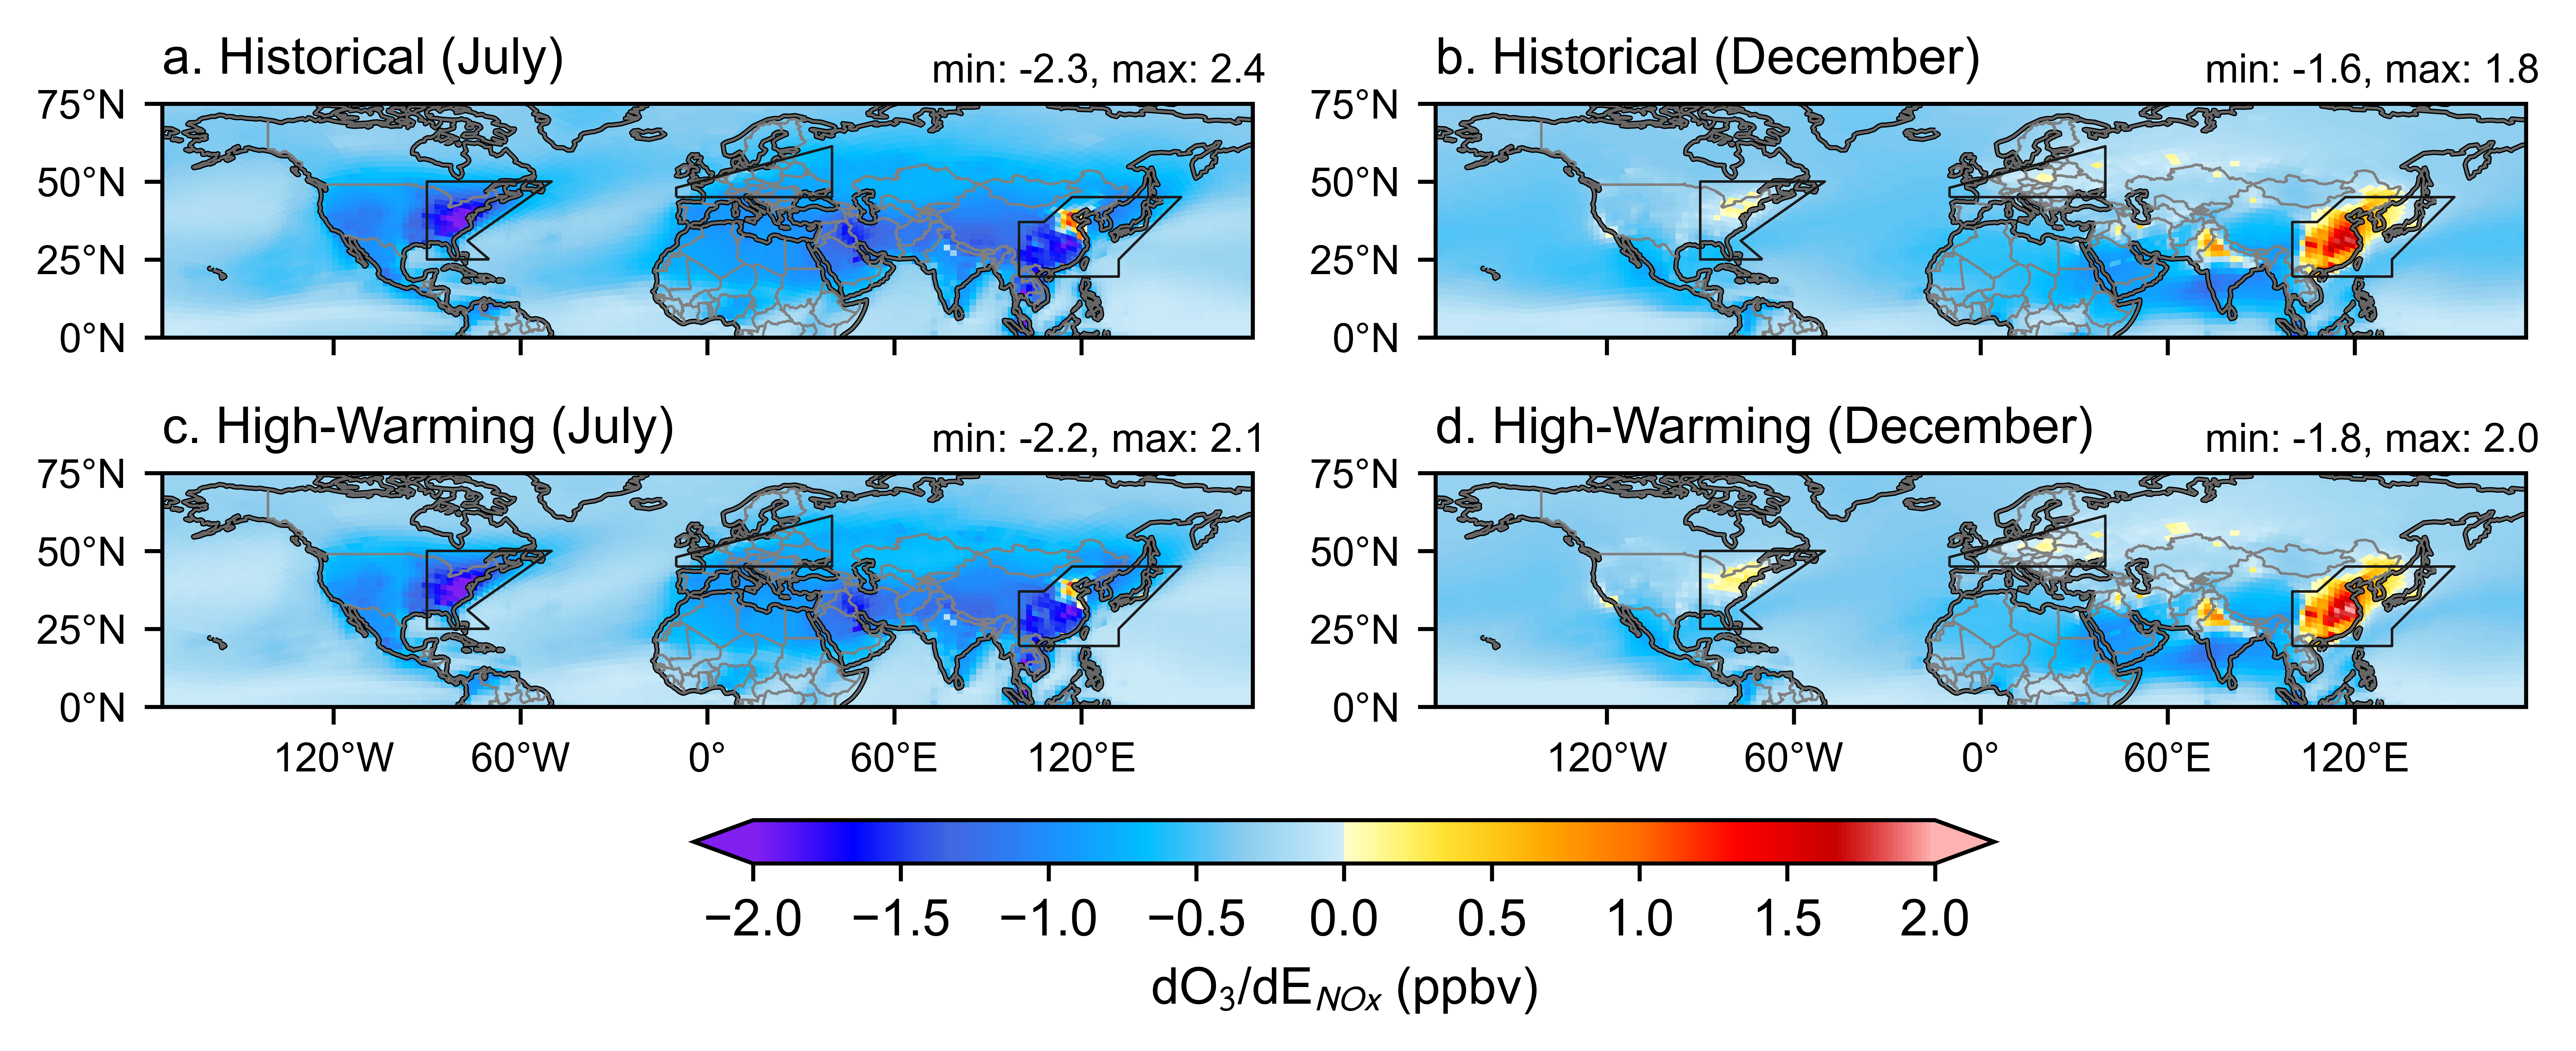

In [12]:
tools.set_matplotlib_font("Arial")
fig, ax = plt.subplots(
        dpi=1200,
        figsize=(7,2.8),
        sharex=False, sharey=True,
        nrows=2, ncols=2,
        constrained_layout=True,
        subplot_kw={"projection": ccrs.PlateCarree()}
    )
ax = ax.flatten()
titles= ["a. Historical (July)", "b. Historical (December)", "c. High-Warming (July)", "d. High-Warming (December)"]

for idx, z in enumerate([mean_jul_pres, mean_dec_pres, mean_jul_fut, mean_dec_fut]):

    cmap = cmaps.ncl_default

    plot = single_panel(plot_vals=z, 
                ax=ax[idx], gridtype="cs", 
                comap=cmap,
                extent=(-175, 175, 0, 75), 
                vmin=-2, vmax=2,
                unit="ppbv",
                title=None,
                add_cb=False)


    ax[idx].coastlines(linewidth=0.5)
    country_borders = cfeature.NaturalEarthFeature(
        category="cultural",
        name="admin_0_boundary_lines_land",
        scale="50m",
        facecolor="none",
    )
    ax[idx].add_feature(country_borders, edgecolor="gray", linewidth=0.5)
    ax[idx].set_extent([-175, 175, 0, 75], crs=ccrs.PlateCarree())
    ax[idx].set_title(titles[idx], loc='left', size=10)

    if idx > 1: # bottom panels have xticklabels
        ax[idx].set_xticks([-120, -60, 0, 60, 120])
        ax[idx].set_xticklabels(
            ['120°W', '60°W', '0°', '60°E', '120°E'], fontsize=8)
        ax[idx].set_yticks([0,25,50,75])
        ax[idx].set_yticklabels(
            ['0°N', '25°N', '50°N', '75°N'], fontsize=8)
    else:
        print('yes!')
        ax[idx].set_xticks([-120, -60, 0, 60, 120])
        ax[idx].set_xticklabels(['', '', '', '', ''], fontsize=8)
        ax[idx].set_yticks([0,25,50,75])
        ax[idx].set_yticklabels(
            ['0°N', '25°N', '50°N', '75°N'], fontsize=8)

    # Add boxes around the IPCC AR6 regions
    ar6 = regionmask.defined_regions.ar6.all
    ar6[5,17,35].plot(ax=ax[idx],
        add_ocean=False,
        projection=ccrs.PlateCarree(),
        add_label=False,
        line_kws=dict(lw=0.5)
    )

    ax[idx].annotate("min: "+"{:.1f}".format(z.min().values)+", max: "+"{:.1f}".format(z.max().values), (72,82), size=8)
    

ticks = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
cax,kw = mpl.colorbar.make_axes([ax for ax in ax.flat], location='bottom', pad=0.05, shrink=0.55, aspect=30, extend='both')
cbar = fig.colorbar(plot, ticks=ticks, cax=cax, **kw)
cbar.set_label('dO$_3$/dE$_{NOx}$ (ppbv)', fontsize=10) # ($\Delta$ MDA8 O$_3$ per 10$\%$ reduction in E$_{NO_x}$)

#plt.savefig("/home/eleroy/proj-dirs/OZCLIM/paper_figures/figure2.png", format="png")
plt.show()

In [14]:
std_jul_pres = present_diff['SpeciesConc_O3'].sel(time=present_diff.time.dt.month.isin([7])).resample(time='1Y').mean().std(dim=['sim','time']).isel(lev=0, drop=True)
std_dec_pres = present_diff['SpeciesConc_O3'].sel(time=present_diff.time.dt.month.isin([12])).resample(time='1Y').mean().std(dim=['sim','time']).isel(lev=0, drop=True)

std_jul_fut = future_diff['SpeciesConc_O3'].sel(time=future_diff.time.dt.month.isin([7])).resample(time='1Y').mean().std(dim=['sim','time']).isel(lev=0, drop=True)
std_dec_fut = future_diff['SpeciesConc_O3'].sel(time=future_diff.time.dt.month.isin([12])).resample(time='1Y').mean().std(dim=['sim','time']).isel(lev=0, drop=True)

/home/eleroy/.conda/envs/OZCLIM-env/lib/python3.10/site-packages/xarray/core/groupby.py:346: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/eleroy/.conda/envs/OZCLIM-env/lib/python3.10/site-packages/xarray/core/groupby.py:346: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/eleroy/.conda/envs/OZCLIM-env/lib/python3.10/site-packages/xarray/core/groupby.py:346: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/eleroy/.conda/envs/OZCLIM-env/lib/python3.10/site-packages/xarray/core/groupby.py:346: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:


In [41]:
import numpy as np
import xarray as xr
from scipy.stats import shapiro

# Function to calculate Shapiro-Wilk p-values for a 1D array
def calculate_p_values(data):
    if len(data) > 3:  # Shapiro-Wilk requires at least 3 data points
        normal_p = shapiro(data)[1]  # p-value for normality
        if np.all(data > 0):
            lognormal_p = shapiro(np.log(data))[1]  # p-value for log-normality
        else:
            lognormal_p = np.nan
    else:
        normal_p, lognormal_p = np.nan, np.nan
    return normal_p, lognormal_p

# Wrapper to handle grid cells efficiently
def calculate_p_values_grid(data):
    normal_p_values = np.empty(data.shape[:-1])
    lognormal_p_values = np.empty(data.shape[:-1])
    
    # Iterate over grid cells (vectorized internally)
    for idx in np.ndindex(data.shape[:-1]):
        normal_p, lognormal_p = calculate_p_values(data[idx])
        normal_p_values[idx] = normal_p
        lognormal_p_values[idx] = lognormal_p
        
    return normal_p_values, lognormal_p_values

# Group data by year and average over time
data_jul = present_diff['SpeciesConc_O3'].sel(time=present_diff.time.dt.month.isin([7]))
data_jul = data_jul.isel(lev=0).resample(time='1Y').mean(dim='time')

data_jul = data_jul.chunk({"time": -1})  # Single chunk for the time dimension


# Apply the function across all grid cells
normal_p_values, lognormal_p_values = xr.apply_ufunc(
    calculate_p_values_grid,
    data_jul,
    input_core_dims=[["time"]],
    output_core_dims=[[], []],
    vectorize=True,
    dask="parallelized",  # Enable parallel computation if using Dask
    output_dtypes=[float, float],
)


/home/eleroy/.conda/envs/OZCLIM-env/lib/python3.10/site-packages/xarray/core/groupby.py:346: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:


In [32]:
data_jul

<xarray.DataArray 'SpeciesConc_O3' (sim: 5, time: 16, nf: 6, Ydim: 48, Xdim: 48)>
dask.array<rechunk-merge, shape=(5, 16, 6, 48, 48), dtype=float64, chunksize=(1, 16, 6, 48, 48), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-12-31 2001-12-31 ... 2015-12-31
  * Xdim     (Xdim) float64 305.8 307.4 309.0 310.6 ... 29.37 31.01 32.63 34.21
  * Ydim     (Ydim) float64 -44.21 -42.62 -41.01 -39.36 ... 41.01 42.62 44.21
  * nf       (nf) int32 1 2 3 4 5 6
    lons     (nf, Ydim, Xdim) float32 dask.array<chunksize=(6, 48, 48), meta=np.ndarray>
    lats     (nf, Ydim, Xdim) float32 dask.array<chunksize=(6, 48, 48), meta=np.ndarray>
    lev      float64 1.0
Dimensions without coordinates: sim

In [31]:
lognormal_p_values.mean().values

array(0.20474389)

In [15]:
std_jul_pres_land = tools.mask_ocean_c48(std_jul_pres)
std_dec_pres_land = tools.mask_ocean_c48(std_dec_pres)

std_jul_fut_land = tools.mask_ocean_c48(std_jul_fut)
std_dec_fut_land = tools.mask_ocean_c48(std_dec_fut)

jul_pres_ENA = tools.crop_regionmask_ar6_c48(std_jul_pres_land, 5)
jul_pres_WCE = tools.crop_regionmask_ar6_c48(std_jul_pres_land, 17)
jul_pres_EAS = tools.crop_regionmask_ar6_c48(std_jul_pres_land, 35)

dec_pres_ENA = tools.crop_regionmask_ar6_c48(std_dec_pres_land, 5)
dec_pres_WCE = tools.crop_regionmask_ar6_c48(std_dec_pres_land, 17)
dec_pres_EAS = tools.crop_regionmask_ar6_c48(std_dec_pres_land, 35)

std_jul_pres_ENA = jul_pres_ENA.mean(dim=['nf', 'Ydim', 'Xdim'])
std_jul_pres_WCE = jul_pres_WCE.mean(dim=['nf', 'Ydim', 'Xdim'])
std_jul_pres_EAS = jul_pres_EAS.mean(dim=['nf', 'Ydim', 'Xdim'])

std_dec_pres_ENA = dec_pres_ENA.mean(dim=['nf', 'Ydim', 'Xdim'])
std_dec_pres_WCE = dec_pres_WCE.mean(dim=['nf', 'Ydim', 'Xdim'])
std_dec_pres_EAS = dec_pres_EAS.mean(dim=['nf', 'Ydim', 'Xdim'])


In [16]:
print(std_jul_pres_ENA.values)
print(std_jul_pres_WCE.values)
print(std_jul_pres_EAS.values)

print(std_dec_pres_ENA.values)
print(std_dec_pres_WCE.values)
print(std_dec_pres_EAS.values)


[0.13874737]
[0.08342636]
[0.21666081]
[0.08009325]
[0.08521144]
[0.17142701]


In [17]:
std_jul_fut_ENA = tools.crop_regionmask_ar6_c48(std_jul_fut, 5).mean(dim=['nf', 'Ydim', 'Xdim'])
std_jul_fut_WCE = tools.crop_regionmask_ar6_c48(std_jul_fut, 17).mean(dim=['nf', 'Ydim', 'Xdim'])
std_jul_fut_EAS = tools.crop_regionmask_ar6_c48(std_jul_fut, 35).mean(dim=['nf', 'Ydim', 'Xdim'])

std_dec_fut_ENA = tools.crop_regionmask_ar6_c48(std_dec_fut, 5).mean(dim=['nf', 'Ydim', 'Xdim'])
std_dec_fut_WCE = tools.crop_regionmask_ar6_c48(std_dec_fut, 17).mean(dim=['nf', 'Ydim', 'Xdim'])
std_dec_fut_EAS = tools.crop_regionmask_ar6_c48(std_dec_fut, 35).mean(dim=['nf', 'Ydim', 'Xdim'])

In [18]:
print(std_jul_fut_ENA.values)
print(std_jul_fut_WCE.values)
print(std_jul_fut_EAS.values)

print(std_dec_fut_ENA.values)
print(std_dec_fut_WCE.values)
print(std_dec_fut_EAS.values)


0.11172033433723205
0.09293302392304284
0.18473731501330257
0.062449037866544786
0.056116274441555945
0.1353246667255727


yes!
yes!


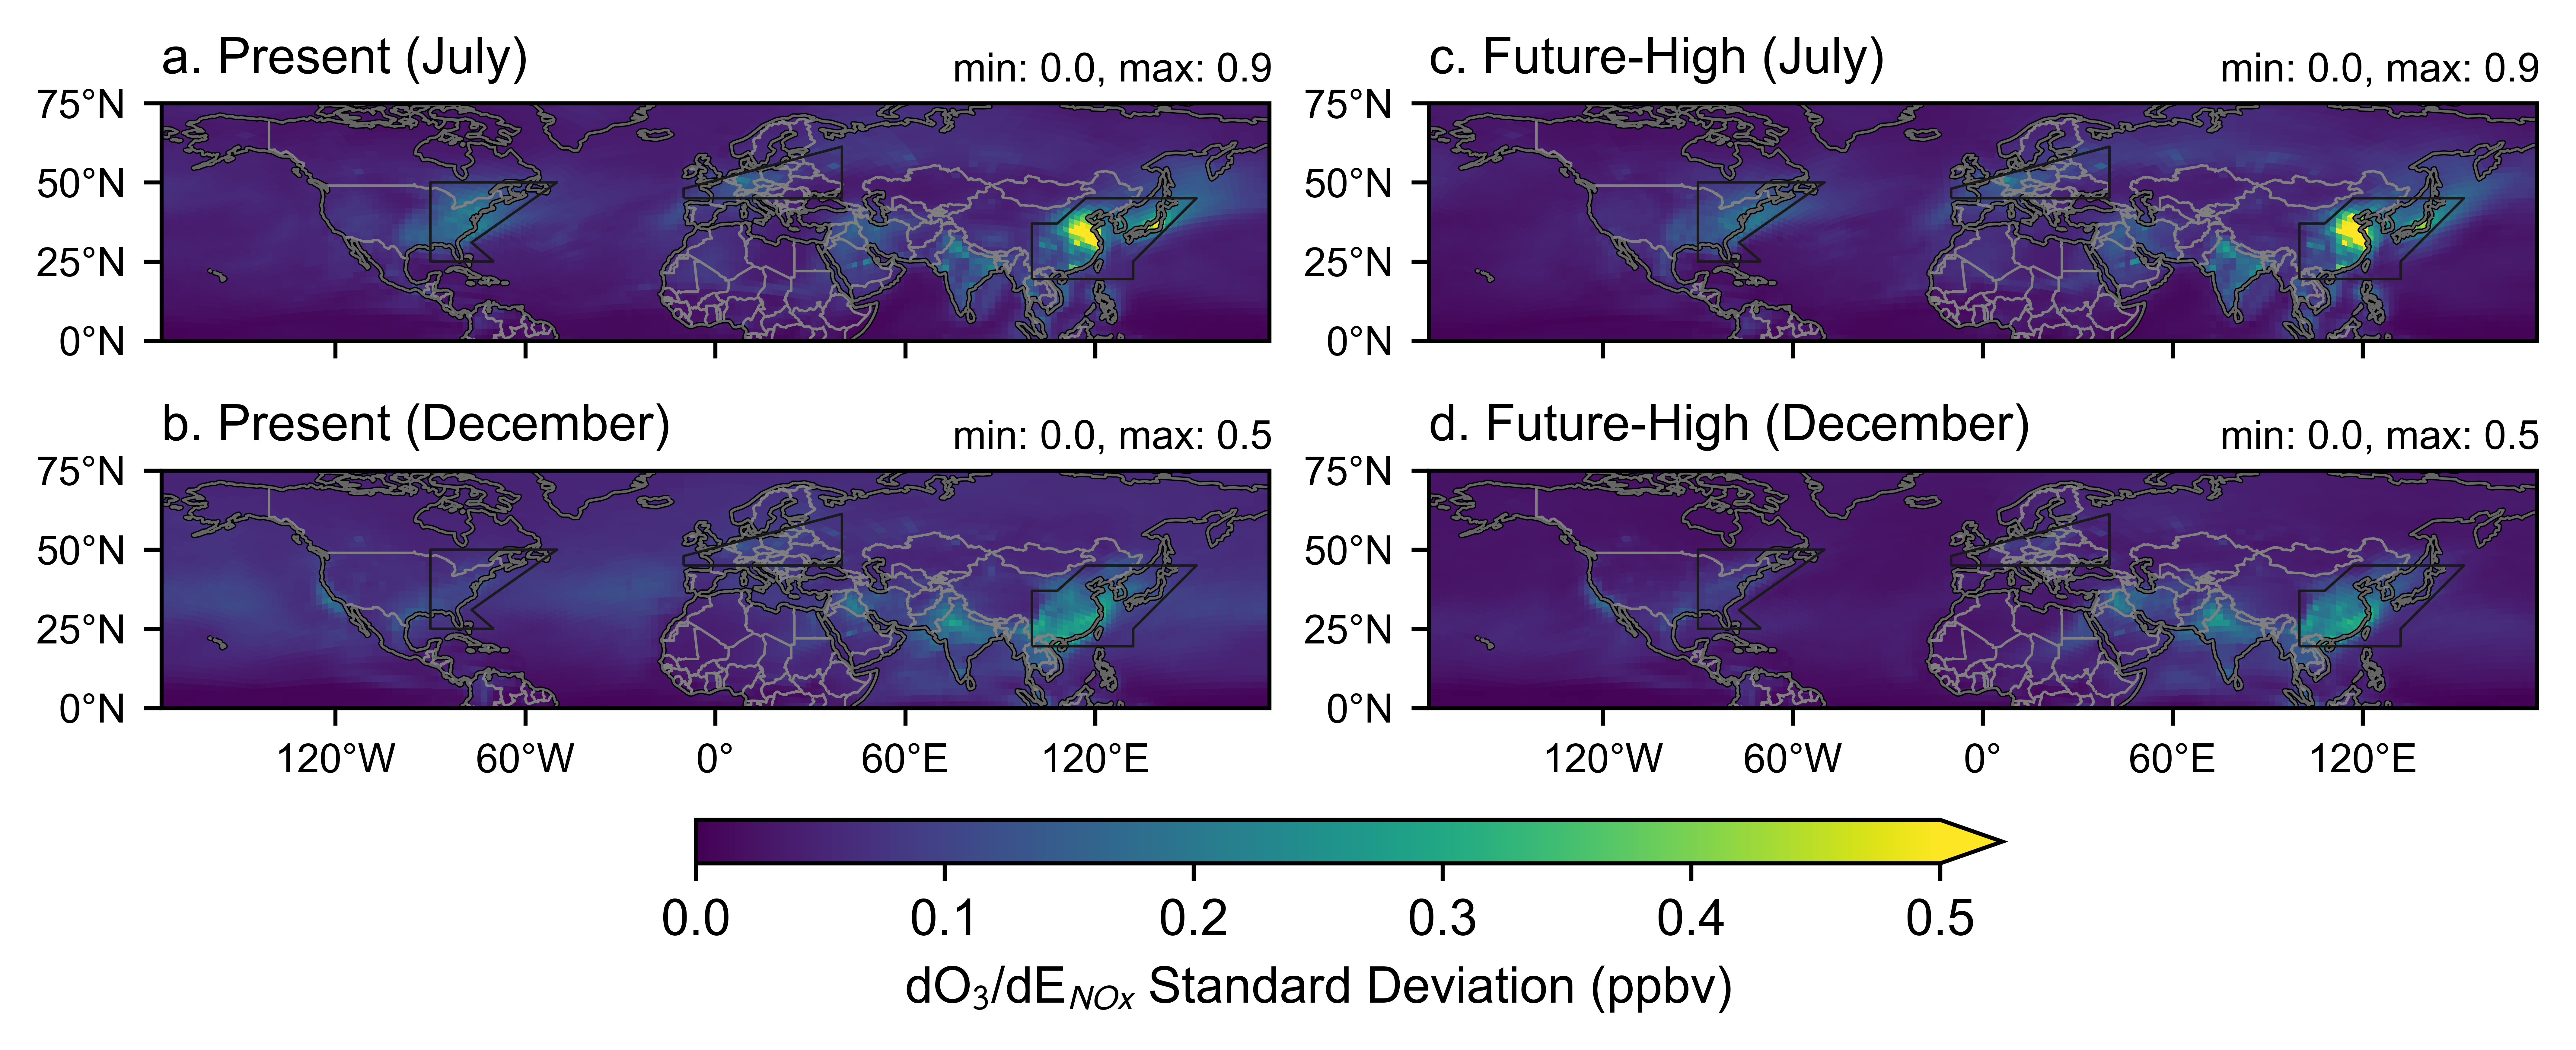

In [19]:
fig, ax = plt.subplots(
        dpi=1200,
        figsize=(7,2.8), 
        sharex=False, sharey=True,
        nrows=2, ncols=2,
        constrained_layout=True,
        subplot_kw={"projection": ccrs.PlateCarree()}
    )
ax = ax.flatten()
titles= ["a. Present (July)", "c. Future-High (July)", "b. Present (December)", "d. Future-High (December)"]

for idx, z in enumerate([std_jul_pres, std_jul_fut, std_dec_pres, std_dec_fut]):

    cmap = cmaps.MPL_viridis

    plot = single_panel(plot_vals=z, 
                ax=ax[idx], gridtype="cs", 
                comap=cmap,
                extent=(-175, 175, 0, 75), 
                vmin=0, vmax=0.5,
                #vmin=0, vmax=10,
                unit="ppbv",
                title=None,
                add_cb=False)


    ax[idx].coastlines(linewidth=0.5)
    country_borders = cfeature.NaturalEarthFeature(
        category="cultural",
        name="admin_0_boundary_lines_land",
        scale="50m",
        facecolor="none",
    )
    ax[idx].add_feature(country_borders, edgecolor="gray", linewidth=0.5)
    ax[idx].set_extent([-175, 175, 0, 75], crs=ccrs.PlateCarree())
    ax[idx].set_title(titles[idx], loc='left', size=10)

    if idx > 1: # bottom panels have xticklabels
        ax[idx].set_xticks([-120, -60, 0, 60, 120])
        ax[idx].set_xticklabels(
            ['120°W', '60°W', '0°', '60°E', '120°E'], fontsize=8)
        ax[idx].set_yticks([0,25,50,75])
        ax[idx].set_yticklabels(
            ['0°N', '25°N', '50°N', '75°N'], fontsize=8)
    else:
        print('yes!')
        ax[idx].set_xticks([-120, -60, 0, 60, 120])
        ax[idx].set_xticklabels(['', '', '', '', ''], fontsize=8)
        ax[idx].set_yticks([0,25,50,75])
        ax[idx].set_yticklabels(
            ['0°N', '25°N', '50°N', '75°N'], fontsize=8)

    # Add boxes around the IPCC AR6 regions
    ar6 = regionmask.defined_regions.ar6.all
    ar6[5,17,35].plot(ax=ax[idx],
        add_ocean=False,
        projection=ccrs.PlateCarree(),
        add_label=False,
        line_kws=dict(lw=0.5)
    )

    ax[idx].annotate("min: "+"{:.1f}".format(z.min().values)+", max: "+"{:.1f}".format(z.max().values), (75,82), size=8)
    

ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
cax,kw = mpl.colorbar.make_axes([ax for ax in ax.flat], location='bottom', pad=0.05, shrink=0.55, aspect=30, extend='max')
cbar = fig.colorbar(plot, ticks=ticks, cax=cax, **kw)
cbar.set_label('dO$_3$/dE$_{NOx}$ Standard Deviation (ppbv)', fontsize=10) # ($\Delta$ MDA8 O$_3$ per 10$\%$ reduction in E$_{NO_x}$)

#plt.savefig("/home/eleroy/proj-dirs/OZCLIM/paper_figures/figureS3.png", format="png")
